# Table of Contents
 <p><div class="lev1 toc-item"><a href="#GPU" data-toc-modified-id="GPU-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GPU</a></div><div class="lev1 toc-item"><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev2 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev3 toc-item"><a href="#Load-Train-Data" data-toc-modified-id="Load-Train-Data-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Load Train Data</a></div><div class="lev3 toc-item"><a href="#Load-Test-Data" data-toc-modified-id="Load-Test-Data-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Load Test Data</a></div><div class="lev3 toc-item"><a href="#Relation-Types" data-toc-modified-id="Relation-Types-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Relation Types</a></div><div class="lev2 toc-item"><a href="#Participle" data-toc-modified-id="Participle-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Participle</a></div><div class="lev2 toc-item"><a href="#Make-Adjacency-List" data-toc-modified-id="Make-Adjacency-List-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Make Adjacency List</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Train-Data" data-toc-modified-id="Make-Adjacency-List-of-Train-Data-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Make Adjacency List of Train Data</a></div><div class="lev3 toc-item"><a href="#Make-Adjacency-List-of-Test-Data" data-toc-modified-id="Make-Adjacency-List-of-Test-Data-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Make Adjacency List of Test Data</a></div><div class="lev1 toc-item"><a href="#Word-to-Vector" data-toc-modified-id="Word-to-Vector-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word to Vector</a></div><div class="lev2 toc-item"><a href="#Tokenize-Text" data-toc-modified-id="Tokenize-Text-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tokenize Text</a></div><div class="lev2 toc-item"><a href="#Create-Word-Embeddings-with-GloVe" data-toc-modified-id="Create-Word-Embeddings-with-GloVe-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create Word Embeddings with GloVe</a></div><div class="lev3 toc-item"><a href="#Read-GloVe" data-toc-modified-id="Read-GloVe-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Read GloVe</a></div><div class="lev3 toc-item"><a href="#Use-Glove-to-Initialize-Embedding-Matrix" data-toc-modified-id="Use-Glove-to-Initialize-Embedding-Matrix-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Use Glove to Initialize Embedding Matrix</a></div><div class="lev1 toc-item"><a href="#Build-Dateset" data-toc-modified-id="Build-Dateset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Dateset</a></div><div class="lev1 toc-item"><a href="#Save-Dataset" data-toc-modified-id="Save-Dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save Dataset</a></div><div class="lev1 toc-item"><a href="#Checkpoint" data-toc-modified-id="Checkpoint-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Checkpoint</a></div><div class="lev1 toc-item"><a href="#Build-Model" data-toc-modified-id="Build-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Build Model</a></div><div class="lev2 toc-item"><a href="#Set-Hyperparameters" data-toc-modified-id="Set-Hyperparameters-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Set Hyperparameters</a></div><div class="lev2 toc-item"><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Import Libraries</a></div><div class="lev2 toc-item"><a href="#Build-Graph" data-toc-modified-id="Build-Graph-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Build Graph</a></div><div class="lev2 toc-item"><a href="#Model-Visualization" data-toc-modified-id="Model-Visualization-74"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Model Visualization</a></div><div class="lev2 toc-item"><a href="#Train" data-toc-modified-id="Train-75"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Train</a></div><div class="lev1 toc-item"><a href="#Evaluate" data-toc-modified-id="Evaluate-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluate</a></div>

# GPU

In [1]:
import tensorflow as tf 
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: 


# Data Preprocessing

## Load Data

### Load Train Data

In [2]:
import json

In [3]:
sentText = []
relationMentions = []
relationLabels = []
entityMentions = []
entityLabels = []
em1Text = []
em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/train.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    # Exclude "None" label
    if not all(i['label'] == 'None' for i in item['relationMentions']):
        sentText.append(item['sentText'])
        relationMentions.append(item['relationMentions'])
        entityMentions.append(item['entityMentions'])
    
relationLabels = [[i['label'].split('/')[-1] for i in rM] for rM in relationMentions]
entityLabels = [[i['text'] for i in eM] for eM in entityMentions]
em1Text = [[i['em1Text'] for i in rM] for rM in relationMentions]
em2Text = [[i['em2Text'] for i in rM] for rM in relationMentions]

In [4]:
# Clean words
replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
em1Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em1Text]
em2Text = [[''.join([replaceDict.get(i, i) for i in e]) for e in eT] for eT in em2Text]

### Load Test Data

In [5]:
t_sentText = []
t_relationMentions = []
t_relationLabels = []
t_entityMentions = []
t_entityLabels = []
t_em1Text = []
t_em2Text = []

with open("/Users/lizhn7/Downloads/DATA/nyt/test.json") as f:
    lines = f.readlines()

for line in lines:
    item = json.loads(line)
    t_sentText.append(item['sentText'])
    t_relationMentions.append(item['relationMentions'])
    t_entityMentions.append(item['entityMentions'])
    
t_relationLabels = [[i['label'].split('/')[-1] for i in rM] for rM in t_relationMentions]
t_entityLabels = [[i['text'] for i in eM] for eM in t_entityMentions]
t_em1Text = [[i['em1Text'] for i in rM] for rM in t_relationMentions]
t_em2Text = [[i['em2Text'] for i in rM] for rM in t_relationMentions]

In [6]:
# Clean words
t_replaceDict = {
               'ā': 'a', 'á': 'a', 'ǎ': 'a', 'à': 'a',
               'ō': 'o', 'ó': 'o', 'ǒ': 'o', 'ò': 'o', 'ô': 'o', 'ö': 'o',
               'ē': 'e', 'é': 'e', 'ě': 'e', 'è': 'e', 
               'ī': 'i', 'í': 'i', 'ǐ': 'i', 'ì': 'i',
               'ū': 'u', 'ú': 'u', 'ǔ': 'u', 'ù': 'u', 'ü': 'u',
               'ñ': 'n',
               'É': 'E'
              }
t_em1Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em1Text]
t_em2Text = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_em2Text]
t_entityLabels = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_entityLabels]

###  Relation Types

In [7]:
relationTypes = list(set([r for rl in relationLabels for r in rl]))
relationTypes

['religion',
 'contains',
 'country',
 'teams',
 'geographic_distribution',
 'major_shareholders',
 'administrative_divisions',
 'place_of_birth',
 'location',
 'children',
 'founders',
 'advisors',
 'neighborhood_of',
 'people',
 'nationality',
 'profession',
 'industry',
 'capital',
 'place_founded',
 'company',
 'major_shareholder_of',
 'place_lived',
 'place_of_death',
 'ethnicity']

In [8]:
t_relationTypes = list(set([r for rl in t_relationLabels for r in rl if r != 'None']))
t_relationTypes

['children',
 'capital',
 'contains',
 'company',
 'founders',
 'place_lived',
 'place_of_death',
 'country',
 'neighborhood_of',
 'nationality',
 'administrative_divisions',
 'place_of_birth']

## Participle

In [10]:
from nltk import regexp_tokenize

In [11]:
def cut(s):
    """
    Participle
    """
    pattern = r'''
              (?x)                   # set flag to allow verbose regexps 
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A. 
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages 
              |\w+(?:[-&']\w+)*       # words w/ optional internal hyphens/apostrophe  
           '''  
    return regexp_tokenize(s, pattern=pattern)

In [12]:
sentWords = [cut(s) for s in sentText]
entlabWords = [[cut(s) for s in eL] for eL in entityLabels]
em1Words = [[cut(s) for s in eL] for eL in em1Text]
em2Words = [[cut(s) for s in eL] for eL in em2Text]
t_sentWords = [cut(s) for s in t_sentText]
t_entlabWords = [[cut(s) for s in eL] for eL in t_entityLabels]
t_em1Words = [[cut(s) for s in eL] for eL in t_em1Text]
t_em2Words = [[cut(s) for s in eL] for eL in t_em2Text]

In [31]:
MAX_SENT_LEN = 120
MAX_ADJL_LEN = 12

## Make Adjacency List

### Make Adjacency List of Train Data

In [33]:
from collections import Counter

In [34]:
i_entityLabels = []
for i in range(len(sentWords)):
    eL = []
    sDict = list(enumerate(sentWords[i]))
    j = 0
    for item in entlabWords[i]:
        el = []
        for e in item:
            while j < len(sDict):
                if e == sDict[j][1]:
                    el.append(sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    i_entityLabels.append(eL)

In [35]:
rmSet = []
for item in range(len(relationMentions)):
    rms = [(em1Words[item][i][0], em2Words[item][i][0], relationLabels[item][i]) for i in range(len(relationLabels[item]))]
    rms = [' '.join(list(i)) for i in rms]
    rmSet.append(rms)
rmSet = [set(i) for i in rmSet]

In [39]:
i_adjacencyList = []
new_sentWords = []
for n in range(len(sentWords)):
    aL = []
    for l in range(len(relationLabels[n])):
        e1 = []
        e2 = []
        for item in i_entityLabels[n]:
            if ' '.join([sentWords[n][i] for i in item]) == ' '.join(em1Words[n][l]):
                e1.append(item[0])
            if ' '.join([sentWords[n][i] for i in item]) == ' '.join(em2Words[n][l]):
                e2.append(item[0])
        c1 = [(a, b) for a in e1 for b in e2 if ' '.join([sentWords[n][a], sentWords[n][b], relationLabels[n][l]]) in rmSet[n]]
        c2 = [(a, b) for a in e2 for b in e1 if ' '.join([sentWords[n][b], sentWords[n][a], relationLabels[n][l]]) in rmSet[n]]
        c = c1 + c2
        m = min([(i, abs(j[0]-j[1])) for i, j in enumerate(c)], key=lambda x: x[-1])[-1]
        r = [i[0] for i in [(i, abs(j[0]-j[1])) for i, j in enumerate(c)] if i[-1] == m]
        for i in r:
            if ' '.join([sentWords[n][c[i][0]], sentWords[n][c[i][1]], relationLabels[n][l]]) in rmSet[n]:
                al = (c[i][0], pad[0], c[i][1], pad[1], relationLabels[n][l], pad[2])
                if al[4] in t_relationTypes and al[0] < MAX_SENT_LEN and al[2] < MAX_SENT_LEN: 
                    aL.append(al)
    aL = sorted([list(i) for i in set(aL)])
    if len(aL) == 1 or len(aL) == 2:
        i_adjacencyList.append(aL)
        new_sentWords.append(sentWords[n])
i_adjacencyList = [sum(i, []) for i in i_adjacencyList]

### Make Adjacency List of Test Data

In [48]:
# Clean words
t_sentWords = [[''.join([t_replaceDict.get(i, i) for i in e]) for e in eT] for eT in t_sentWords]

In [49]:
ti_entityLabels = []
for i in range(len(t_sentWords)):
    eL = []
    t_sDict = list(enumerate(t_sentWords[i]))
    j = 0
    for item in t_entlabWords[i]:
        el = []
        for e in item:
            while j < len(t_sDict):
                if e == t_sDict[j][1]:
                    el.append(t_sDict[j][0])
                    j += 1
                    break
                j += 1
        eL.append(el)
    ti_entityLabels.append(eL)

In [50]:
ti_trueLables = [[i for i, j in enumerate(rl) if j != 'None'] for rl in t_relationLabels]
t_trueMentions = [[j for i, j in enumerate(rl) if j['label'] != 'None'] for rl in t_relationMentions]
pad = ['POI', 'RE', 'EOP']
ti_adjacencyList = []
for n in range(len(t_sentWords)): 
    e1 = []
    e2 = []
    aL = []
    for l in ti_trueLables[n]:
        for item in ti_entityLabels[n]:
            if ' '.join([t_sentWords[n][i] for i in item]) == ' '.join(t_em1Words[n][l]):
                e1.append(item[0])
            if ' '.join([t_sentWords[n][i] for i in item]) == ' '.join(t_em2Words[n][l]):
                e2.append(item[0])
    c = [(a, b) for a in e1 for b in e2]
    r = c[min([(i, abs(j[0]-j[1])) for i, j in enumerate(c)], key=lambda x: x[-1])[0]]
    aL = aL + [r[0], pad[0], r[1], pad[1], t_relationLabels[n][l], pad[2]]
    ti_adjacencyList.append(aL)

# Modify 
ti_adjacencyList[26] = [34, 'POI', 36, 'RE', 'founders', 'EOP']
ti_adjacencyList[191] = [22, 'POI', 36, 'RE', 'country', 'EOP', 33, 'POI', 36, 'RE', 'country', 'EOP']

# Word to Vector

## Tokenize Text

In [53]:
from keras.preprocessing.text import Tokenizer
from nltk import WordNetLemmatizer

Using TensorFlow backend.


In [54]:
wnl = WordNetLemmatizer()
sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in new_sentWords]
t_sentWords = [[wnl.lemmatize(t.lower()) for t in toks] for toks in t_sentWords]
tok_sentWords = sentWords.copy()
tok_sentWords.extend(t_sentWords)
tokTexts = [' '.join(i) for i in tok_sentWords]

In [55]:
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(tokTexts)
word2index = tokenizer.word_index
index2word = {i: w for w, i in word2index.items()}
print('Found %s unique tokens.' % len(word2index))

Found 65574 unique tokens.


## Create Word Embeddings with GloVe

In [64]:
VOCAB_SIZE = 65575
EMBEDDING_SIZE = 300
SEED = 42

### Read GloVe

In [65]:
import numpy as np

In [66]:
glove_n_symbols = !wc -l /Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt
glove_n_symbols = int(glove_n_symbols[0].split()[0])
glove_n_symbols

1917495

In [67]:
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, EMBEDDING_SIZE))
globale_scale = 0.1
with open('/Users/lizhn7/Downloads/DATA/Glove/glove.42B.300d.txt', 'r') as fp:
    index = 0
    for l in fp:
        l = l.strip().split()
        word = l[0]
        glove_index_dict[word] = index
        glove_embedding_weights[index, :] = [float(n) for n in l[1:]]
        index += 1
glove_embedding_weights *= globale_scale

### Use Glove to Initialize Embedding Matrix

In [68]:
from nltk import PorterStemmer, LancasterStemmer

In [69]:
# Generate random embedding with same scale as glove
np.random.seed(SEED)
shape = (VOCAB_SIZE, EMBEDDING_SIZE)
scale = glove_embedding_weights.std() * np.sqrt(12) / 2 
embedding = np.random.uniform(low=-scale, high=scale, size=shape)

In [70]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [71]:
# Copy from glove weights of words that appear in index2word
count = 0 
for i in range(1, VOCAB_SIZE):
    w = index2word[i]
    g = glove_index_dict.get(w)
    if g is None:
        w = porter.stem(w)
        g = glove_index_dict.get(w)
    if g is None:
        w = lancaster.stem(w)
        g = glove_index_dict.get(w)
    if g is not None:
        embedding[i, :] = glove_embedding_weights[g, :]
        count += 1
print('{num_tokens}-{per:.2f}% tokens in vocab found in glove and copied to embedding.'.format(num_tokens=count, per=count/float(VOCAB_SIZE)*100))

61085-93.15% tokens in vocab found in glove and copied to embedding.


# Build Dateset

In [72]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [73]:
new_sentText = [' '.join(i) for i in sentWords]
sentSeq = tokenizer.texts_to_sequences(new_sentText)
sentData = pad_sequences(sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

t_new_sentText = [' '.join(i) for i in t_sentWords]
t_sentSeq = tokenizer.texts_to_sequences(t_new_sentText)
t_sentData = pad_sequences(t_sentSeq, maxlen=MAX_SENT_LEN, padding='post', truncating='post')

token2index = dict((j, i+120) for i, j in enumerate(['PAD']+pad+t_relationTypes))
token2index['PAD'] = 0
index2token = {i: w for w, i in token2index.items()}
newi_adjacencyList = [[token2index[i] if i in token2index else i+1 for i in aL] for aL in i_adjacencyList]
newi_adjacencyList = pad_sequences(newi_adjacencyList, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')
newti_adjacencyList = [[token2index[i] if i in token2index else i+1 for i in aL] for aL in ti_adjacencyList]
newti_adjacencyList = pad_sequences(newti_adjacencyList, maxlen=MAX_ADJL_LEN, padding='post', truncating='post')

In [75]:
# Split the data into a training set, a validation set and a test set
x_train_all = sentData
y_train_all = newi_adjacencyList

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.15, random_state=SEED)
x_train_all, _, y_train_all, _  = train_test_split(x_train_all, y_train_all, test_size=0., random_state=SEED)
 
x_test = t_sentData
y_test = newti_adjacencyList

x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0., random_state=SEED)

# Save Dataset

In [76]:
import h5py
import pickle

In [79]:
fh = h5py.File('/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/allData.h5', 'w')
fh['x_train'] = x_train
fh['y_train'] = y_train
fh['x_val'] = x_val
fh['y_val'] = y_val
fh['x_train_all'] = x_train_all
fh['y_train_all'] = y_train_all
fh['x_test'] = x_test
fh['y_test'] = y_test
fh['embedding'] = embedding
fh.close()

In [80]:
with open('/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/index.pkl', 'wb') as fp:
    pickle.dump((word2index, index2word, token2index, index2token), fp, -1)

# Checkpoint

In [81]:
import h5py
import pickle

In [82]:
with h5py.File('/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/allData.h5', 'r') as fh:
    x_train = fh['x_train'][:]
    y_train = fh['y_train'][:]
    x_val = fh['x_val'][:]
    y_val = fh['y_val'][:]
    x_train_all = fh['x_train_all'][:]
    y_train_all = fh['y_train_all'][:]
    x_test = fh['x_test'][:]
    y_test = fh['y_test'][:]
    embedding = fh['embedding'][:]

In [83]:
with open('/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/index.pkl', 'rb') as fp:
    word2index, index2word, token2index, index2token = pickle.load(fp)

# Build Model

##  Set Hyperparameters

In [126]:
#300-600-0.5-256-79-20-5
MAX_SENT_LEN = 120
MAX_ADJL_LEN = 12
VOCAB_SIZE = len(word2index)+1
NUM_CLASSES = 136
EMBEDDING_SIZE = 300

ENC_RNN_SIZE = 300
DEC_RNN_SIZE = 600
DROPOUT_RATE = 0.5
NUM_EPOCHS = 256
BATCH_SIZE = 79
STEPS_PER_EPOCH = 20
TEST_STEPS = len(x_test)//BATCH_SIZE

VALIDATION_STEPS = 3

In [127]:
print('NUM_EPOCHS: \t\t%d' % NUM_EPOCHS)
print('STEPS_PER_EPOCH: \t%d' % STEPS_PER_EPOCH)
print('TEST_STEPS: \t\t%d' % TEST_STEPS)
print('VALIDATION_STEPS: \t%d' % VALIDATION_STEPS)
print('TRAIN_BATCHES: \t\t%d' % (NUM_EPOCHS * STEPS_PER_EPOCH))
print('NUM_BATCHES \t\t%d' % (len(x_train)//BATCH_SIZE+1))

NUM_EPOCHS: 		256
STEPS_PER_EPOCH: 	20
TEST_STEPS: 		5
VALIDATION_STEPS: 	3
TRAIN_BATCHES: 		5120
NUM_BATCHES 		612


## Import Libraries

In [128]:
from keras.layers import Input, Embedding, Dropout, Bidirectional, LSTM, RepeatVector, TimeDistributed, Dense
from keras.models import Model
import keras.backend as K
from keras.callbacks import*
from keras.utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Build Graph

In [129]:
K.clear_session()
sequence = Input(shape=(MAX_SENT_LEN,), name='INPUT') 
emb_seq = Embedding(VOCAB_SIZE, EMBEDDING_SIZE, weights=[embedding], mask_zero=True, input_length=MAX_SENT_LEN, trainable=True, name='EMBEDDING')(sequence)
emb_seq = Dropout(DROPOUT_RATE)(emb_seq)
blstm = Bidirectional(LSTM(ENC_RNN_SIZE, return_sequences=True, implementation=0), merge_mode='concat', name='ENC_BLSTM_1')(emb_seq)
blstm = Dropout(DROPOUT_RATE)(blstm)
blstm = Bidirectional(LSTM(ENC_RNN_SIZE, return_sequences=False, implementation=0), merge_mode='concat', name='ENC_BLSTM_2')(blstm)
blstm = Dropout(DROPOUT_RATE)(blstm)
context = RepeatVector(MAX_ADJL_LEN, name='CONTEXT')(blstm)
lstm = LSTM(DEC_RNN_SIZE, return_sequences=True, implementation=0, name='DEC_LSTM')(context)
lstm = Dropout(DROPOUT_RATE)(lstm)
output = TimeDistributed(Dense(NUM_CLASSES, activation='softmax'), name='OUTPUT')(lstm)
model = Model(inputs=sequence, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

## Model Visualization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 120)               0         
_________________________________________________________________
EMBEDDING (Embedding)        (None, 120, 300)          19672500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 300)          0         
_________________________________________________________________
ENC_BLSTM_1 (Bidirectional)  (None, 120, 600)          1442400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 600)          0         
_________________________________________________________________
ENC_BLSTM_2 (Bidirectional)  (None, 600)               2162400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
__________

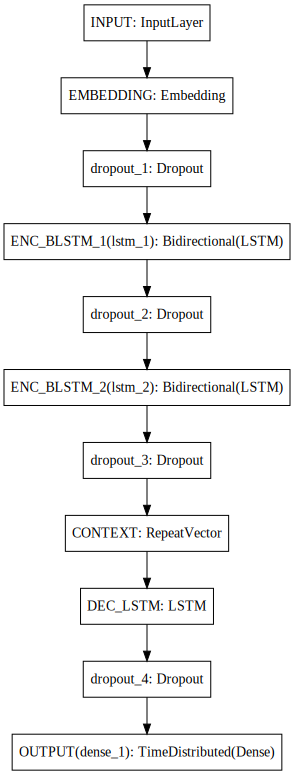

In [130]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Train

In [131]:
def gen_label(s):
    """
    One-hot encoding
    """
    gen = to_categorical(s, num_classes=NUM_CLASSES)
    return gen

def data_generator_all(data, label, batch_size):
    """
    Yield batches of all data
    """
    count = 0
    while True:
        if count >= len(data): 
            count = 0
        x = np.zeros((batch_size, MAX_SENT_LEN))
        y = np.zeros((batch_size, MAX_ADJL_LEN, NUM_CLASSES))
        for i in range(batch_size):
            n = i + count
            if n > len(data)-1:
                break
            x[i, :] = data[n]
            y[i, :, :] = gen_label(label[n])
        count += batch_size
        yield (x, y)
        
def data_generator(data, label, batch_size): 
    """
    Yield batches 
    """
    index = np.arange(len(data))
    np.random.shuffle(index)    
    batches = [index[range(batch_size*i, min(len(data), batch_size*(i+1)))] for i in range(len(data)//batch_size)]
    while True:
        for i in batches:
            x, y = data[i], np.array(list(map(gen_label, label[i])))
            yield (x, y)

In [132]:
gen_train_all = data_generator(x_train_all, y_train_all, BATCH_SIZE)
gen_test = data_generator_all(x_test, y_test, BATCH_SIZE)
gen_train = data_generator(x_train, y_train, BATCH_SIZE)
gen_val = data_generator(x_val, y_val, BATCH_SIZE)

In [133]:
# Continue Trian
# filename = 'cp_logs/.hdf5'
# model.load_weights(filename)
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [134]:
filepath = '/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/cp_logs/weights.{epoch:03d}-{val_loss:.6f}.hdf5'
log_string = '/Users/lizhn7/Downloads/DATA/nyt/experiment_4_1/tb_logs/300-600-0.5-256-79-20-5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir=log_string, 
                          histogram_freq=1, 
                          write_graph=False, 
                          write_grads=False, 
                          batch_size=BATCH_SIZE, 
                          write_images=True, 
                          embeddings_freq=1, 
                          embeddings_layer_names=None,
                          embeddings_metadata=None) 

In [ ]:
history = model.fit_generator(gen_train_all, 
                              steps_per_epoch=STEPS_PER_EPOCH, 
                              epochs=NUM_EPOCHS, 
                              verbose=1,
                              callbacks=[checkpoint, tensorboard],
                              validation_data=gen_test, 
                              validation_steps=TEST_STEPS)

Epoch 1/256
20/20 [==============================] - 195s - loss: 2.9350 - val_loss: 1.8524
Epoch 2/256
20/20 [==============================] - 183s - loss: 2.1633 - val_loss: 1.3086
Epoch 3/256
20/20 [==============================] - 185s - loss: 1.8177 - val_loss: 1.1552
Epoch 4/256
20/20 [==============================] - 180s - loss: 1.5797 - val_loss: 1.0387
Epoch 5/256
20/20 [==============================] - 184s - loss: 1.4300 - val_loss: 1.0675
Epoch 6/256
20/20 [==============================] - 181s - loss: 1.9255 - val_loss: 1.0267
Epoch 7/256
20/20 [==============================] - 185s - loss: 1.3069 - val_loss: 0.9967
Epoch 8/256
20/20 [==============================] - 185s - loss: 1.2937 - val_loss: 1.0191
Epoch 9/256
20/20 [==============================] - 184s - loss: 1.2543 - val_loss: 0.9208
Epoch 10/256
20/20 [==============================] - 191s - loss: 1.2675 - val_loss: 0.9371
Epoch 11/256
20/20 [==============================] - 186s - loss: 1.2208 - val

20/20 [==============================] - 177s - loss: 0.9292 - val_loss: 0.7845
Epoch 36/256
20/20 [==============================] - 176s - loss: 0.8991 - val_loss: 0.7862
Epoch 37/256
20/20 [==============================] - 179s - loss: 0.8752 - val_loss: 0.8883
Epoch 38/256
20/20 [==============================] - 177s - loss: 0.9088 - val_loss: 0.7811
Epoch 39/256
20/20 [==============================] - 176s - loss: 0.8896 - val_loss: 0.9027
Epoch 40/256
20/20 [==============================] - 175s - loss: 0.8775 - val_loss: 0.8255
Epoch 41/256
20/20 [==============================] - 178s - loss: 0.8960 - val_loss: 0.8950
Epoch 42/256
20/20 [==============================] - 176s - loss: 0.8519 - val_loss: 0.8781
Epoch 43/256
20/20 [==============================] - 178s - loss: 0.8804 - val_loss: 0.8725
Epoch 44/256
20/20 [==============================] - 177s - loss: 0.8720 - val_loss: 0.7871
Epoch 45/256
20/20 [==============================] - 177s - loss: 0.8542 - val_los

20/20 [==============================] - 180s - loss: 0.7424 - val_loss: 0.8002
Epoch 75/256
20/20 [==============================] - 175s - loss: 0.7337 - val_loss: 0.8324
Epoch 76/256
20/20 [==============================] - 177s - loss: 0.7175 - val_loss: 0.8776
Epoch 77/256
20/20 [==============================] - 176s - loss: 0.7105 - val_loss: 0.7868
Epoch 78/256
20/20 [==============================] - 177s - loss: 0.7071 - val_loss: 0.8078
Epoch 79/256
20/20 [==============================] - 176s - loss: 0.7259 - val_loss: 0.7547
Epoch 80/256
20/20 [==============================] - 176s - loss: 0.7261 - val_loss: 0.8309
Epoch 81/256
20/20 [==============================] - 176s - loss: 0.7017 - val_loss: 0.8013
Epoch 82/256
20/20 [==============================] - 177s - loss: 0.6975 - val_loss: 0.8246
Epoch 83/256
20/20 [==============================] - 177s - loss: 0.7020 - val_loss: 0.8038
Epoch 84/256
20/20 [==============================] - 176s - loss: 0.6869 - val_los

20/20 [==============================] - 177s - loss: 0.6102 - val_loss: 0.7623
Epoch 116/256
20/20 [==============================] - 176s - loss: 0.6099 - val_loss: 0.8583
Epoch 117/256
20/20 [==============================] - 177s - loss: 0.5829 - val_loss: 0.7719
Epoch 118/256
20/20 [==============================] - 177s - loss: 0.5921 - val_loss: 0.8781
Epoch 119/256
20/20 [==============================] - 176s - loss: 0.5846 - val_loss: 0.8300
Epoch 120/256
20/20 [==============================] - 176s - loss: 0.5910 - val_loss: 0.8819
Epoch 121/256
20/20 [==============================] - 178s - loss: 0.5811 - val_loss: 0.8765
Epoch 122/256
20/20 [==============================] - 178s - loss: 0.5701 - val_loss: 0.9080
Epoch 123/256
20/20 [==============================] - 177s - loss: 0.6044 - val_loss: 0.8758
Epoch 124/256
20/20 [==============================] - 178s - loss: 0.5831 - val_loss: 0.8385
Epoch 125/256
20/20 [==============================] - 176s - loss: 0.5665

20/20 [==============================] - 178s - loss: 0.5055 - val_loss: 1.0486
Epoch 157/256
20/20 [==============================] - 177s - loss: 0.5013 - val_loss: 0.9103
Epoch 158/256
20/20 [==============================] - 178s - loss: 0.4916 - val_loss: 0.9684
Epoch 159/256
20/20 [==============================] - 177s - loss: 0.5203 - val_loss: 0.9793
Epoch 160/256
20/20 [==============================] - 178s - loss: 0.5129 - val_loss: 0.8122
Epoch 161/256
20/20 [==============================] - 177s - loss: 0.4841 - val_loss: 0.8491
Epoch 162/256
20/20 [==============================] - 177s - loss: 0.4897 - val_loss: 0.8154
Epoch 163/256
20/20 [==============================] - 178s - loss: 0.4853 - val_loss: 0.8005
Epoch 164/256
20/20 [==============================] - 176s - loss: 0.5274 - val_loss: 0.8693
Epoch 165/256
20/20 [==============================] - 177s - loss: 0.5044 - val_loss: 0.9392
Epoch 166/256
20/20 [==============================] - 178s - loss: 0.4679

20/20 [==============================] - 178s - loss: 0.4217 - val_loss: 0.9120
Epoch 199/256
20/20 [==============================] - 178s - loss: 0.4267 - val_loss: 0.9058
Epoch 200/256
20/20 [==============================] - 178s - loss: 0.4509 - val_loss: 0.8813
Epoch 201/256
20/20 [==============================] - 177s - loss: 0.4346 - val_loss: 0.9416
Epoch 202/256
20/20 [==============================] - 178s - loss: 0.4118 - val_loss: 0.8887
Epoch 203/256
20/20 [==============================] - 178s - loss: 0.4488 - val_loss: 0.8955
Epoch 204/256
20/20 [==============================] - 176s - loss: 0.4452 - val_loss: 0.9213
Epoch 205/256
20/20 [==============================] - 178s - loss: 0.4234 - val_loss: 1.0473
Epoch 206/256
20/20 [==============================] - 177s - loss: 0.3918 - val_loss: 0.9445
Epoch 207/256
20/20 [==============================] - 179s - loss: 0.4403 - val_loss: 0.9761
Epoch 208/256
20/20 [==============================] - 178s - loss: 0.4399

# Evaluate

In [14]:
filename = '/Users/lizhn7/Downloads/DATA/nyt/experiment_3_2/cp_logs/allLSTM_w2v/weights.050-0.592349.hdf5'
model.load_weights(filename)

In [15]:
result = np.argmax(model.predict(x_test, batch_size=BATCH_SIZE, verbose=1), -1)

395/395 [==============================] - 13s    


In [19]:
preResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in result]
actResult = [' '.join([index2token.get(i, str(i)) for i in sent if i != 0]) for sent in y_test]
for i in range(395):
    print('Predict: \t%s' % preResult[i])
    print('Ground-Truth: \t%s' % actResult[i])
    print('---')

Predict: 	9 POI 9 RE contains EOP
Ground-Truth: 	9 POI 10 RE country EOP
---
Predict: 	2 POI 15 RE contains EOP
Ground-Truth: 	16 POI 14 RE country EOP
---
Predict: 	10 POI 12 RE contains POI RE EOP
Ground-Truth: 	11 POI 13 RE nationality EOP
---
Predict: 	13 POI 12 RE contains EOP
Ground-Truth: 	14 POI 9 RE contains EOP
---
Predict: 	13 POI 14 RE place_lived EOP
Ground-Truth: 	12 POI 15 RE place_lived EOP
---
Predict: 	9 POI 8 RE contains EOP
Ground-Truth: 	10 POI 9 RE contains EOP
---
Predict: 	1 POI 8 RE company EOP
Ground-Truth: 	8 POI 1 RE founders EOP
---
Predict: 	13 POI 15 RE contains EOP
Ground-Truth: 	20 POI 16 RE country EOP
---
Predict: 	9 POI 32 RE contains EOP
Ground-Truth: 	19 POI 13 RE country POI 13 RE country EOP 19 POI 13 RE country POI 13 RE country EOP
---
Predict: 	6 POI 6 RE contains EOP RE EOP
Ground-Truth: 	17 POI 6 RE contains EOP
---
Predict: 	12 POI 10 RE contains EOP
Ground-Truth: 	26 POI 29 RE company EOP
---
Predict: 	12 POI 12 RE contains EOP
Ground-Trut

In [22]:
set([len(i.split()) for i in actResult])

{6, 8, 10, 12, 18, 20}